In [1]:
#1차 데이터 전처리 특성중요도 0.01미만 54개 제거
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 데이터 불러오기
data = pd.read_csv('./train_data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도가 낮은 특성 제거 (중요도 0.01 미만인 특성 제거)
important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
data_input = data_input[important_features]

# 중요한 특성만 포함한 데이터프레임에 타겟 변수 'Bankrupt?' 컬럼 추가
data_with_target = data_input.copy()
data_with_target['Bankrupt?'] = data_target


data_with_target.to_csv('./train_data .csv', index=False)



In [2]:
# 제거할 특성 불러오기
low_importance_features = pd.read_csv('./low_importance_features.csv')['Feature'].tolist()

# 새로운 데이터 불러오기
test_data = pd.read_csv('./test_data.csv')

# 제거할 특성을 데이터에서 제거
test_data  = test_data.drop(columns=low_importance_features)

# 중요한 특성만 포함된 새로운 데이터 저장
file_path_test  = './test_data .csv'
test_data .to_csv(file_path_test , index=False)

file_path_test 

'./test_data .csv'

In [3]:
test_data = pd.read_csv('./test_data_reduced.csv')
ntest_input = test_data.drop(columns=['Bankrupt?'])
ntest_input_reduced = ntest_input[important_features]
ntest_target = test_data['Bankrupt?']

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./train_data_reduced.csv')

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 재학습
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(train_input, train_target_reduced)


# 3. 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(train_input_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input_reduced, train_target_reduced)

# 예측 (하이퍼파라미터 튜닝 후)
train_predictions_tuned = best_rf_model.predict(train_input_reduced)
test_predictions_tuned = best_rf_model.predict(test_input_reduced)
ntest_predictions_tuned = best_rf_model.predict(ntest_input_reduced)

# 모델 평가 - 정확도 (하이퍼파라미터 튜닝 후)
train_accuracy_tuned = accuracy_score(train_target_reduced, train_predictions_tuned)
test_accuracy_tuned = accuracy_score(test_target_reduced, test_predictions_tuned)
ntest_accuracy_tuned = accuracy_score(ntest_target, ntest_predictions_tuned)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_tuned}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_tuned}")
print(f"ntest 세트 정확도 (하이퍼파라미터 튜닝 후): {ntest_accuracy_tuned}")

# 교차 검증 (Cross-Validation, 하이퍼파라미터 튜닝 후)
cv_scores_tuned = cross_val_score(best_rf_model, data_input, data_target, cv=5)
cv_accuracy_tuned = np.mean(cv_scores_tuned)

# 교차 검증 평가 - MSE, MAE (하이퍼파라미터 튜닝 후)
cv_predictions_tuned = cross_val_predict(best_rf_model, data_input, data_target, cv=5)

print("교차 검증 평균 정확도 (하이퍼파라미터 튜닝 후): ", cv_accuracy_tuned)


최적의 하이퍼파라미터: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}
훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9777560498655585
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9714076246334311
ntest 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9860703812316716
교차 검증 평균 정확도 (하이퍼파라미터 튜닝 후):  0.965352887259395


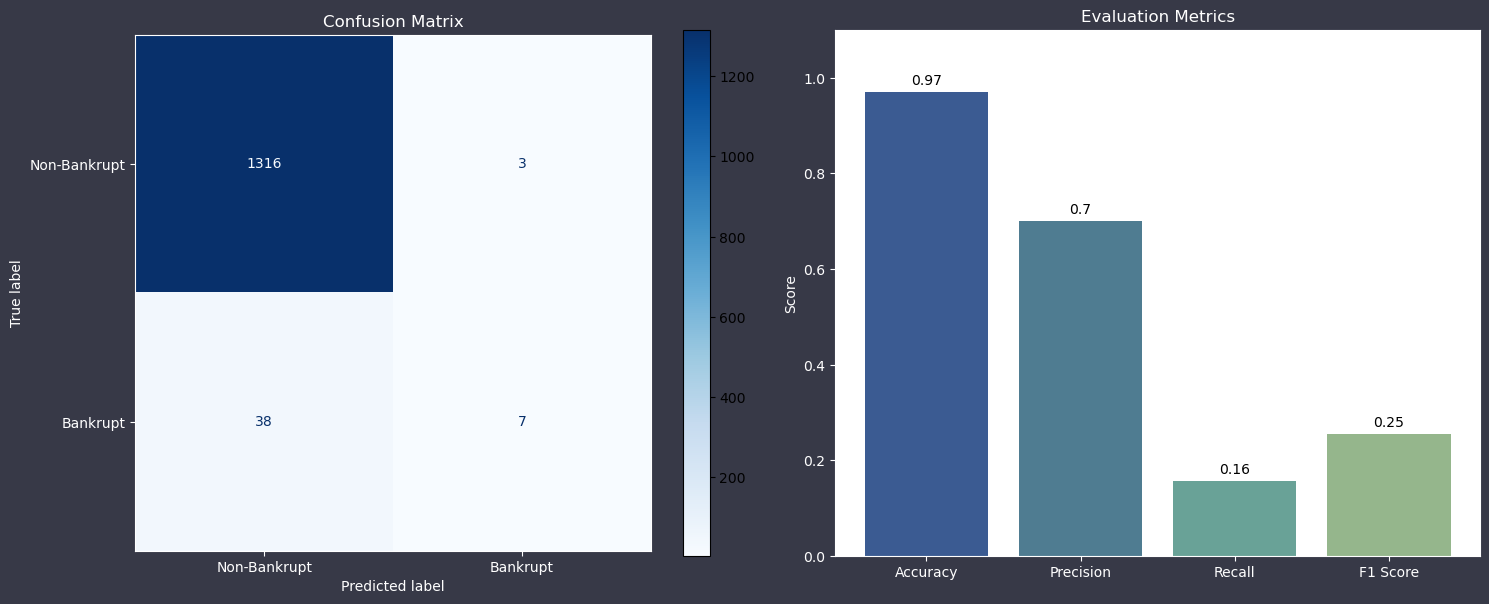

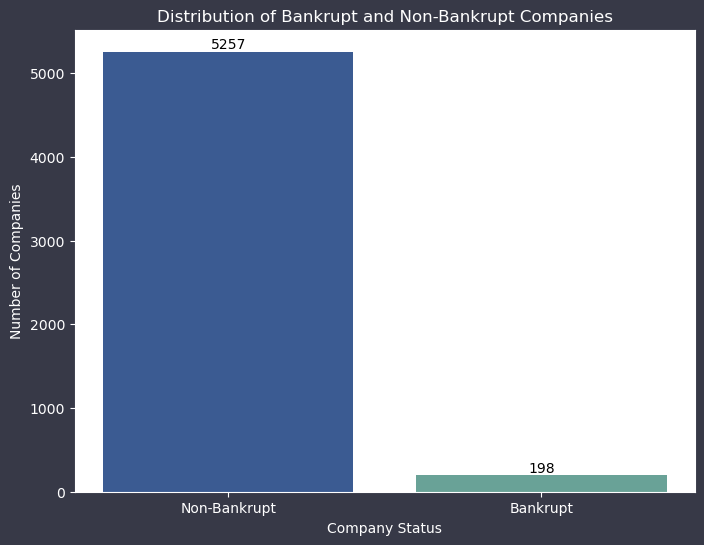

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습 및 예측
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)
test_predictions = rf_model.predict(test_input)

# 평가 지표 계산
accuracy = accuracy_score(test_target, test_predictions)
precision = precision_score(test_target, test_predictions)
recall = recall_score(test_target, test_predictions)
f1 = f1_score(test_target, test_predictions)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(test_target, test_predictions)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('#373947')  # 배경 색상 설정

# 혼동 행렬 시각화
ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Bankrupt', 'Bankrupt']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix', color='white')
axes[0].set_xlabel('Predicted label', color='white')
axes[0].set_ylabel('True label', color='white')
axes[0].tick_params(colors='white')
for spine in axes[0].spines.values():
    spine.set_edgecolor('white')
    
# 평가 지표 시각화
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]
colors = ['#3b5b92', '#4f7c91', '#69a297', '#95b68c']
bars = axes[1].bar(metrics, scores, color=colors)
axes[1].set_ylim(0, 1.1)
axes[1].set_title('Evaluation Metrics', color='white')
axes[1].set_ylabel('Score', color='white')
axes[1].tick_params(colors='white')
for spine in axes[1].spines.values():
    spine.set_edgecolor('white')

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')
plt.tight_layout()
plt.show()

# 타겟 변수 분포 확인
target_counts = data_target.value_counts()

# 불균형 데이터 시각화
plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#373947')  # 배경 색상 설정
colors_distribution = ['#3B5B92', '#69A297']  # 두 번째 그래프의 색상에 맞춰 수정
bars = plt.bar(target_counts.index, target_counts.values, color=colors_distribution)
plt.xticks(target_counts.index, ['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Company Status', color='white')
plt.ylabel('Number of Companies', color='white')
plt.title('Distribution of Bankrupt and Non-Bankrupt Companies', color='white')
plt.gca().set_facecolor('white') #전체배경색
plt.gca().tick_params(colors='white')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')
# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', color='black')
plt.show()


- Non-Bankrupt (비파산) - Non-Bankrupt: 모델이 1316개 회사를 정확하게 비파산으로 예측했습니다.
- Non-Bankrupt (비파산) - Bankrupt (파산): 모델이 3개 회사를 비파산으로 잘못 예측했습니다.
- Bankrupt (파산) - Non-Bankrupt (비파산): 모델이 38개 회사를 비파산으로 잘못 예측했습니다.
- Bankrupt (파산) - Bankrupt (파산): 모델이 7개 회사를 정확하게 파산으로 예측했습니다.

- Accuracy (정확도): 전체 예측 중에서 올바르게 예측한 비율입니다. 이 경우 약 97%로 매우 높습니다.
- Precision (정밀도): 모델이 파산으로 예측한 회사 중 실제로 파산인 회사의 비율입니다. 약 0.7로 비교적 낮습니다.
- Recall (재현율): 실제 파산인 회사 중 모델이 정확히 파산으로 예측한 비율입니다. 약 0.16으로 매우 낮습니다.
- F1 Score: 정밀도와 재현율의 조화 평균입니다. 약 0.26으로 낮습니다.
- 정확도는 매우 높지만, 데이터 불균형 문제로 인해 정밀도, 재현율, F1 점수가 낮습니다. 이는 모델이 비파산 회사를 예측하는 데 매우 강하지만, 파산 회사를 잘 예측하지 못한다는 것을 의미합니다.

- 혼동 행렬은 모델이 비파산 회사를 잘 예측하지만, 파산 회사를 잘 예측하지 못한다는 것을 보여줍니다.
- 평가 지표는 높은 정확도에도 불구하고, 정밀도, 재현율, F1 점수가 낮아 모델의 예측 성능이 파산 예측에 약하다는 것을 시사합니다.
- 데이터 분포는 데이터셋이 매우 불균형하다는 것을 시각적으로 보여줍니다.
- 결론적으로, 높은 정확도는 데이터 불균형 문제를 반영하지 못하며, 모델의 성능을 평가하는 데 있어 정밀도, 재현율, F1 점수와 같은 다른 평가 지표를 고려해야 합니다. 이를 통해 모델이 실제로 중요한 파산 예측에서 얼마나 잘 수행되는지를 평가할 수 있습니다.

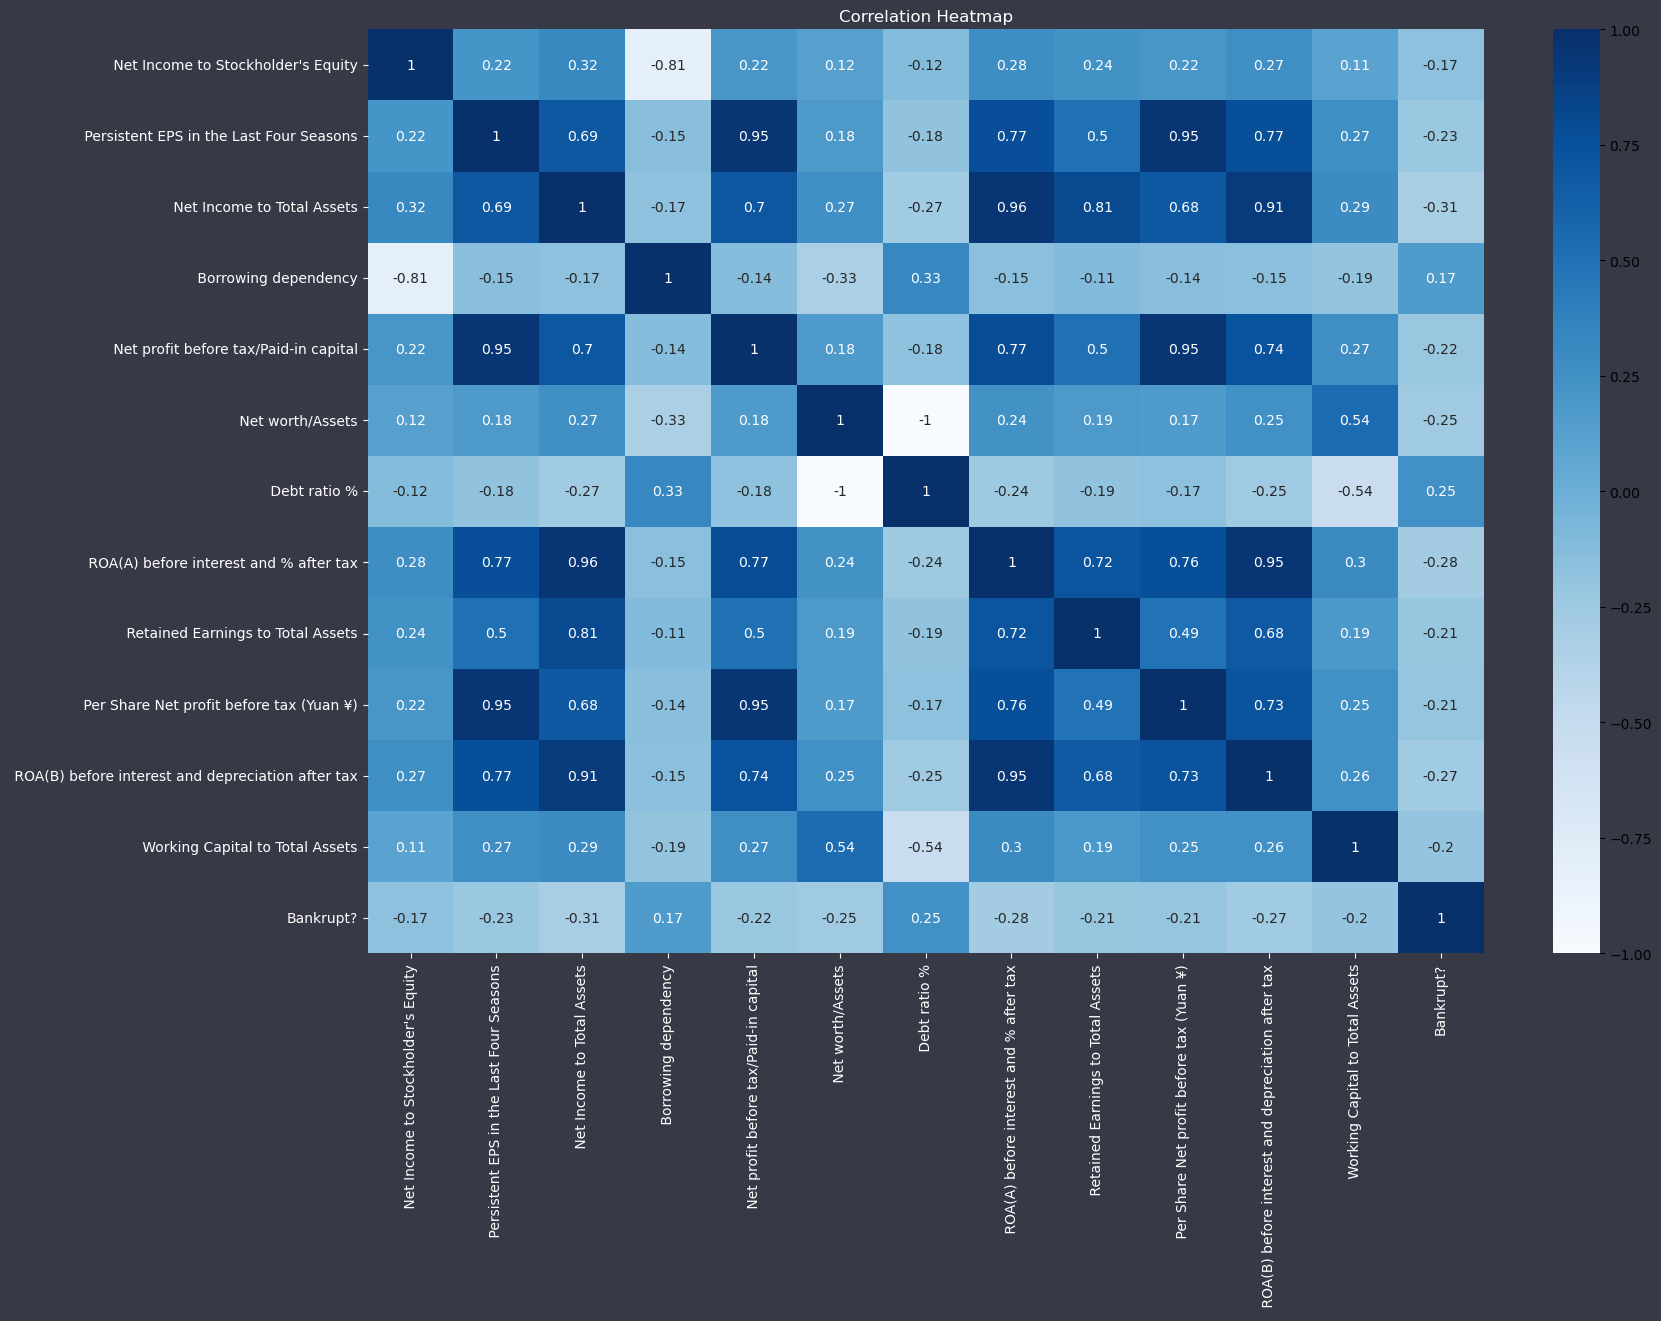

In [6]:
import seaborn as sns
correlations=data.corr()['Bankrupt?'].abs().sort_values()

num_col_to_drop=int(0.7 * len(data.columns))
cols_drop=correlations.iloc[:num_col_to_drop].index
df_dropped= data.drop(cols_drop, axis=1)

plt.figure(figsize=(18,12))
ax = sns.heatmap(df_dropped.corr(), annot=True, cmap='Blues')

plt.gcf().set_facecolor('#373947')
ax.set_facecolor('#373947')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Correlation Heatmap', color='white')
plt.show()

최적의 하이퍼파라미터: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9532085561497327
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.88
교차 검증 평균 정확도 (하이퍼파라미터 튜닝 후):  0.8827587939698492
교차 검증 MSE (하이퍼파라미터 튜닝 후): 0.11723446893787576
교차 검증 MAE (하이퍼파라미터 튜닝 후): 0.11723446893787576


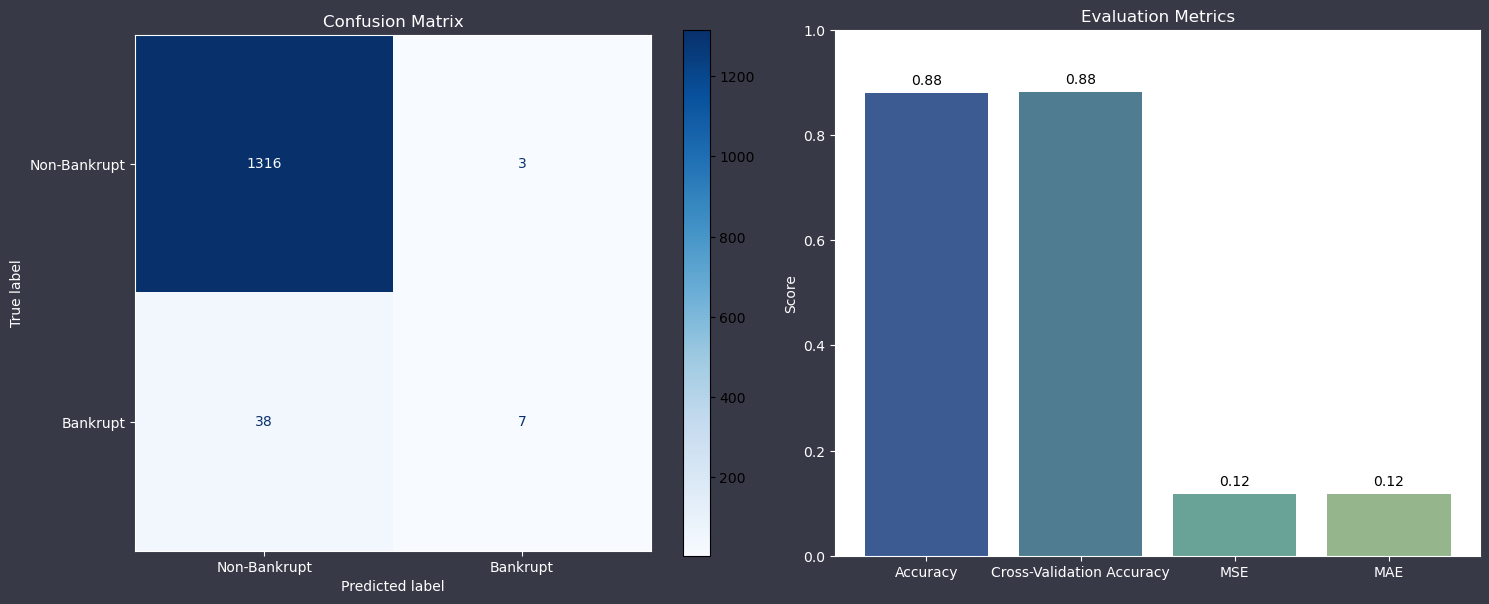

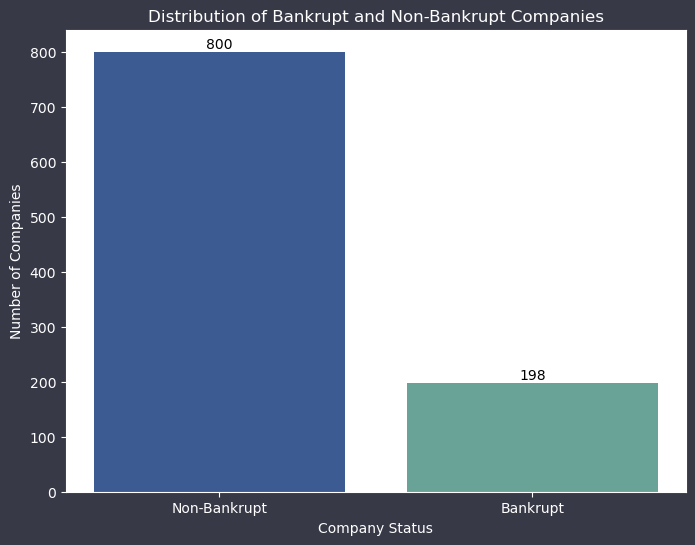

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./train_data_reduced.csv')

# 언더샘플링
Training_data_0 = data[data['Bankrupt?'] == 0].sample(800, random_state=41)
Training_data_1 = data[data['Bankrupt?'] == 1]
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1).reset_index(drop=True)

# 특성과 타겟 변수 분리 (중요도가 낮은 특성 제거 후)
data_input_reduced = Undersample_data.drop(columns=['Bankrupt?'])
data_target = Undersample_data['Bankrupt?']

# 데이터 분리
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 랜덤 포레스트 모델 재학습
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(train_input_reduced, train_target_reduced)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(train_input_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input_reduced, train_target_reduced)

# 예측 (하이퍼파라미터 튜닝 후)
train_predictions_tuned = best_rf_model.predict(train_input_reduced)
test_predictions_tuned = best_rf_model.predict(test_input_reduced)

# 모델 평가 - 정확도 (하이퍼파라미터 튜닝 후)
train_accuracy_tuned = accuracy_score(train_target_reduced, train_predictions_tuned)
test_accuracy_tuned = accuracy_score(test_target_reduced, test_predictions_tuned)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_tuned}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_tuned}")

# 교차 검증 (Cross-Validation, 하이퍼파라미터 튜닝 후)
cv_scores_tuned = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=5)
cv_accuracy_tuned = np.mean(cv_scores_tuned)

print("교차 검증 평균 정확도 (하이퍼파라미터 튜닝 후): ", cv_accuracy_tuned)

# 교차 검증 평가 - MSE, MAE (하이퍼파라미터 튜닝 후)
cv_predictions_tuned = cross_val_predict(best_rf_model, data_input_reduced, data_target, cv=5)
mse = mean_squared_error(data_target, cv_predictions_tuned)
mae = mean_absolute_error(data_target, cv_predictions_tuned)

print(f"교차 검증 MSE (하이퍼파라미터 튜닝 후): {mse}")
print(f"교차 검증 MAE (하이퍼파라미터 튜닝 후): {mae}")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('#373947')  # 배경 색상 설정

# 혼동 행렬 시각화
ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Bankrupt', 'Bankrupt']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix', color='white')
axes[0].set_xlabel('Predicted label', color='white')
axes[0].set_ylabel('True label', color='white')
axes[0].tick_params(colors='white')
for spine in axes[0].spines.values():
    spine.set_edgecolor('white')

# 평가 지표 시각화
metrics = ['Accuracy', 'Cross-Validation Accuracy', 'MSE', 'MAE']
scores = [test_accuracy_tuned, cv_accuracy_tuned, mse, mae]
colors = ['#3b5b92', '#4f7c91', '#69a297', '#95b68c']

bars = axes[1].bar(metrics, scores, color=colors)
axes[1].set_ylim(0, 1)
axes[1].set_title('Evaluation Metrics', color='white')
axes[1].set_ylabel('Score', color='white')
axes[1].tick_params(colors='white')
for spine in axes[1].spines.values():
    spine.set_edgecolor('white')

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

# 타겟 변수 분포 확인
target_counts = data_target.value_counts()

# 불균형 데이터 시각화
plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#373947')  # 배경 색상 설정
colors_distribution = ['#3B5B92', '#69A297']  # 두 번째 그래프의 색상에 맞춰 수정
bars = plt.bar(target_counts.index, target_counts.values, color=colors_distribution)
plt.xticks(target_counts.index, ['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Company Status', color='white')
plt.ylabel('Number of Companies', color='white')
plt.title('Distribution of Bankrupt and Non-Bankrupt Companies', color='white')
plt.gca().set_facecolor('white') #전체배경색
plt.gca().tick_params(colors='white')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')
# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', color='black')
plt.show()



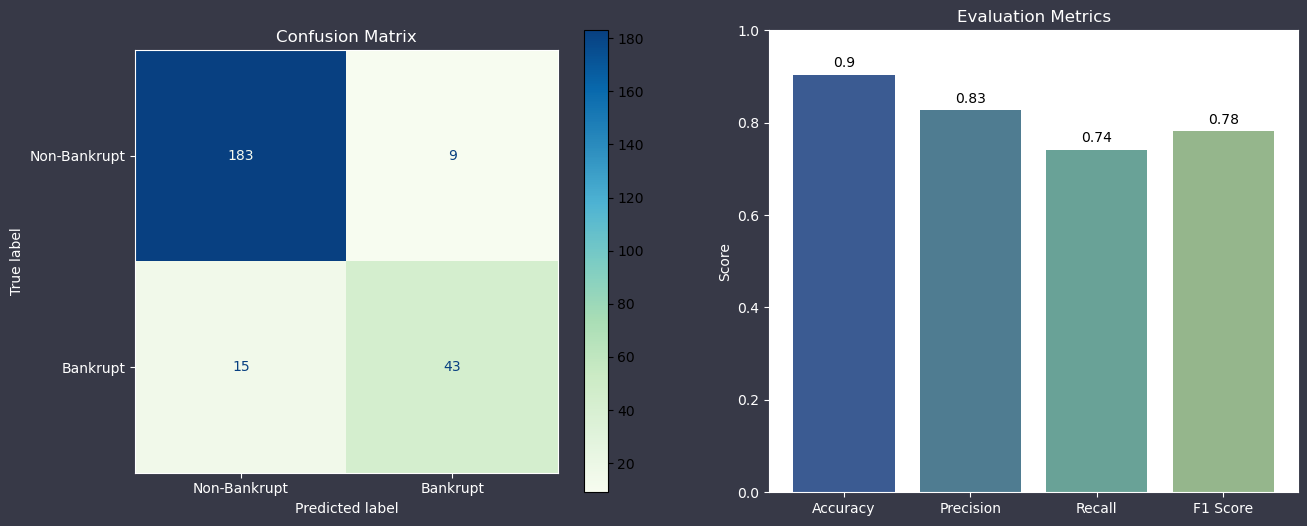

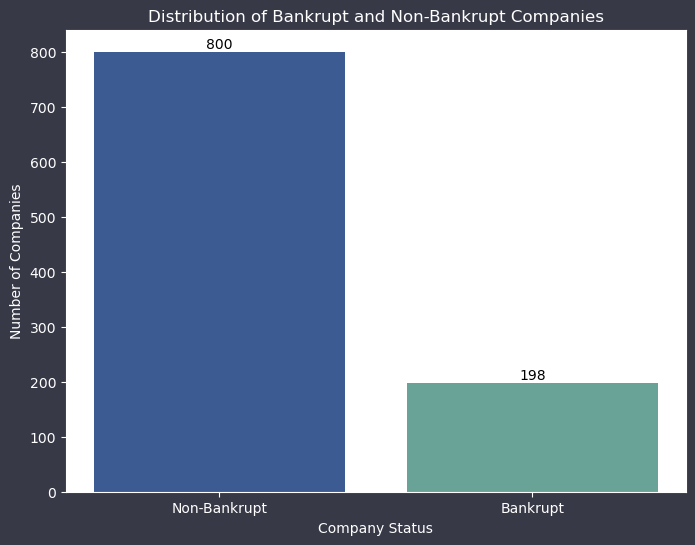

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 데이터 불러오기
data = pd.read_csv('./train_data.csv')

# 언더샘플링
Training_data_0 = data[data['Bankrupt?'] == 0].sample(800, random_state=41)
Training_data_1 = data[data['Bankrupt?'] == 1]
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1).reset_index(drop=True)

# 특성과 타겟 변수 분리
data_input = Undersample_data.drop(columns=['Bankrupt?'])
data_target = Undersample_data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)
test_predictions = rf_model.predict(test_input)

# 평가 지표 계산
accuracy = accuracy_score(test_target, test_predictions)
precision = precision_score(test_target, test_predictions)
recall = recall_score(test_target, test_predictions)
f1 = f1_score(test_target, test_predictions)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(test_target, test_predictions)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('#373947')  # 배경 색상 설정

# 혼동 행렬 시각화
ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Bankrupt', 'Bankrupt']).plot(ax=axes[0], cmap='GnBu')
axes[0].set_title('Confusion Matrix', color='white')
axes[0].set_xlabel('Predicted label', color='white')
axes[0].set_ylabel('True label', color='white')
axes[0].tick_params(colors='white')
for spine in axes[0].spines.values():
    spine.set_edgecolor('white')

# 평가 지표 시각화
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]
colors = ['#3b5b92', '#4f7c91', '#69a297', '#95b68c']
bars = axes[1].bar(metrics, scores, color=colors)
axes[1].set_ylim(0, 1)
axes[1].set_title('Evaluation Metrics', color='white')
axes[1].set_ylabel('Score', color='white')
axes[1].tick_params(colors='white')
for spine in axes[1].spines.values():
    spine.set_edgecolor('white')
# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

plt.show()

# 타겟 변수 분포 확인
target_counts = data_target.value_counts()

# 불균형 데이터 시각화
plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#373947')  # 배경 색상 설정
colors_distribution = ['#3B5B92', '#69A297']  # 두 번째 그래프의 색상에 맞춰 수정
bars = plt.bar(target_counts.index, target_counts.values, color=colors_distribution)
plt.xticks(target_counts.index, ['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Company Status', color='white')
plt.ylabel('Number of Companies', color='white')
plt.title('Distribution of Bankrupt and Non-Bankrupt Companies', color='white')
plt.gca().set_facecolor('white') #전체배경색
plt.gca().tick_params(colors='white')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')
# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', color='black')
plt.show()


- 파산하지 않는 기업을 파산한다고 예측한다. precision(정밀도)을 높이자
- 파산할 기업을 파산하지 않는다고 예측한다. recall(재현율)을 높이자

In [9]:
#1차 데이터 전처리 특성중요도 0.007미만 제거
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도가 낮은 특성 제거 (중요도 0.007 미만인 특성 제거)
important_features = feature_importances[feature_importances['Importance'] > 0.007]['Feature']
data_input_reduced = data_input[important_features]

# 중요한 특성만 포함한 데이터프레임에 타겟 변수 'Bankrupt?' 컬럼 추가
data_reduced_with_target = data_input_reduced.copy()
data_reduced_with_target['Bankrupt?'] = data_target


data_reduced_with_target.to_csv('./data_reduced.csv', index=False)



샘플 크기: 200, 훈련 세트 정확도: 0.9206349206349206, 테스트 세트 정확도: 0.9047619047619048, 교차 검증 평균 정확도: 0.8857142857142858, 재현율: 0.8983050847457628
샘플 크기: 300, 훈련 세트 정확도: 0.9307692307692308, 테스트 세트 정확도: 0.9230769230769231, 교차 검증 평균 정확도: 0.8826923076923077, 재현율: 0.9148936170212766
샘플 크기: 400, 훈련 세트 정확도: 0.9483870967741935, 테스트 세트 정확도: 0.8903225806451613, 교차 검증 평균 정확도: 0.8870967741935484, 재현율: 0.8524590163934426
샘플 크기: 500, 훈련 세트 정확도: 0.9259259259259259, 테스트 세트 정확도: 0.9, 교차 검증 평균 정확도: 0.8861111111111111, 재현율: 0.8275862068965517
샘플 크기: 600, 훈련 세트 정확도: 0.9512195121951219, 테스트 세트 정확도: 0.8731707317073171, 교차 검증 평균 정확도: 0.8853658536585366, 재현율: 0.7272727272727273
샘플 크기: 700, 훈련 세트 정확도: 0.9405797101449276, 테스트 세트 정확도: 0.8782608695652174, 교차 검증 평균 정확도: 0.8902173913043478, 재현율: 0.7209302325581395
샘플 크기: 800, 훈련 세트 정확도: 0.9516339869281045, 테스트 세트 정확도: 0.8901960784313725, 교차 검증 평균 정확도: 0.8970588235294118, 재현율: 0.6326530612244898
샘플 크기: 900, 훈련 세트 정확도: 0.9595238095238096, 테스트 세트 정확도: 0.8892857142857142, 교차 검증 평균 

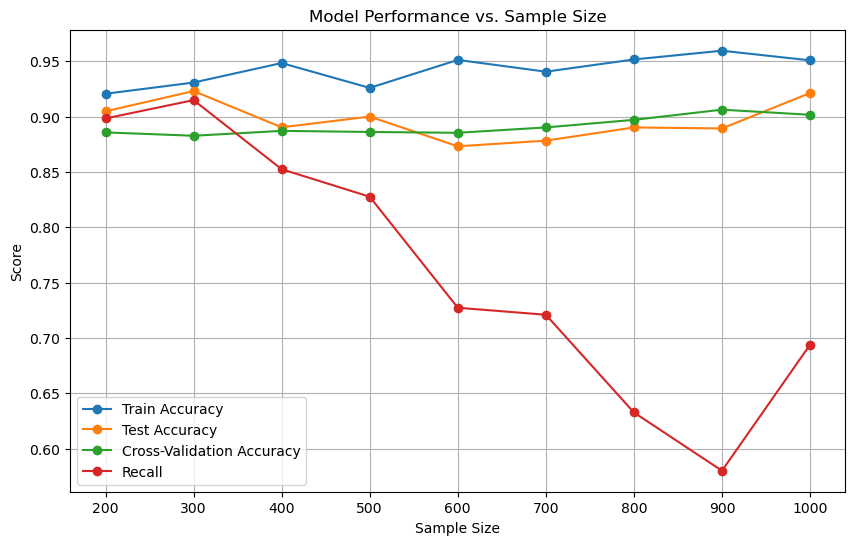

In [10]:
#그리드서치 사용했을 때

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv('./data_reduced.csv')

sample_sizes = range(200, 1001, 100)
train_accuracy_results = []
test_accuracy_results = []
cv_accuracy_results = []
recall_results = []

# 고정된 random_state를 사용하여 데이터 샘플링 유지
for size in sample_sizes:
    # 언더샘플링
    Training_data_0 = data[data['Bankrupt?'] == 0].sample(size, random_state=41)
    Training_data_1 = data[data['Bankrupt?'] == 1]
    Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

    # 특성과 타겟 변수 분리
    data_input_reduced = Undersample_data.drop(columns=['Bankrupt?'])
    data_target = Undersample_data['Bankrupt?']

    # 데이터 분리
    train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
        data_input_reduced, data_target, random_state=42)

    # 랜덤 포레스트 모델 학습
    rf_model_reduced = RandomForestClassifier(random_state=42)
    rf_model_reduced.fit(train_input_reduced, train_target_reduced)

    # 하이퍼파라미터 튜닝
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [10, 15],
        'min_samples_leaf': [4, 6],
        'bootstrap': [True]
    }

    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='accuracy')
    grid_search.fit(train_input_reduced, train_target_reduced)

    best_rf_model = grid_search.best_estimator_

    # 최적의 하이퍼파라미터로 모델 재학습
    best_rf_model.fit(train_input_reduced, train_target_reduced)

    # 예측 (하이퍼파라미터 튜닝 후)
    train_predictions_tuned = best_rf_model.predict(train_input_reduced)
    test_predictions_tuned = best_rf_model.predict(test_input_reduced)

    # 모델 평가 - 정확도 (하이퍼파라미터 튜닝 후)
    train_accuracy_tuned = accuracy_score(train_target_reduced, train_predictions_tuned)
    test_accuracy_tuned = accuracy_score(test_target_reduced, test_predictions_tuned)
    recall_tuned = recall_score(test_target_reduced, test_predictions_tuned)

    train_accuracy_results.append(train_accuracy_tuned)
    test_accuracy_results.append(test_accuracy_tuned)
    recall_results.append(recall_tuned)

    # 교차 검증 (Cross-Validation, 하이퍼파라미터 튜닝 후)
    cv_scores_tuned = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=5)
    cv_accuracy_tuned = np.mean(cv_scores_tuned)
    cv_accuracy_results.append(cv_accuracy_tuned)

    print(f"샘플 크기: {size}, 훈련 세트 정확도: {train_accuracy_tuned}, 테스트 세트 정확도: {test_accuracy_tuned}, 교차 검증 평균 정확도: {cv_accuracy_tuned}, 재현율: {recall_tuned}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracy_results, marker='o', label='Train Accuracy')
plt.plot(sample_sizes, test_accuracy_results, marker='o', label='Test Accuracy')
plt.plot(sample_sizes, cv_accuracy_results, marker='o', label='Cross-Validation Accuracy')
plt.plot(sample_sizes, recall_results, marker='o', label='Recall')
plt.xlabel('Sample Size')
plt.ylabel('Score')
plt.title('Model Performance vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()


샘플 크기: 200, 훈련 세트 정확도: 0.9142857142857143, 테스트 세트 정확도: 0.9142857142857143, 교차 검증 평균 정확도: 0.8761904761904763, 재현율: 0.9152542372881356
샘플 크기: 300, 훈련 세트 정확도: 0.9256410256410257, 테스트 세트 정확도: 0.9153846153846154, 교차 검증 평균 정확도: 0.8865384615384615, 재현율: 0.9148936170212766
샘플 크기: 400, 훈련 세트 정확도: 0.9354838709677419, 테스트 세트 정확도: 0.8838709677419355, 교차 검증 평균 정확도: 0.8838709677419354, 재현율: 0.8524590163934426
샘플 크기: 500, 훈련 세트 정확도: 0.924074074074074, 테스트 세트 정확도: 0.9055555555555556, 교차 검증 평균 정확도: 0.8861111111111111, 재현율: 0.8448275862068966
샘플 크기: 600, 훈련 세트 정확도: 0.9398373983739837, 테스트 세트 정확도: 0.8780487804878049, 교차 검증 평균 정확도: 0.8853658536585366, 재현율: 0.7636363636363637
샘플 크기: 700, 훈련 세트 정확도: 0.9420289855072463, 테스트 세트 정확도: 0.8782608695652174, 교차 검증 평균 정확도: 0.8880434782608695, 재현율: 0.6976744186046512
샘플 크기: 800, 훈련 세트 정확도: 0.9568627450980393, 테스트 세트 정확도: 0.8901960784313725, 교차 검증 평균 정확도: 0.8980392156862745, 재현율: 0.6326530612244898
샘플 크기: 900, 훈련 세트 정확도: 0.9547619047619048, 테스트 세트 정확도: 0.8892857142857

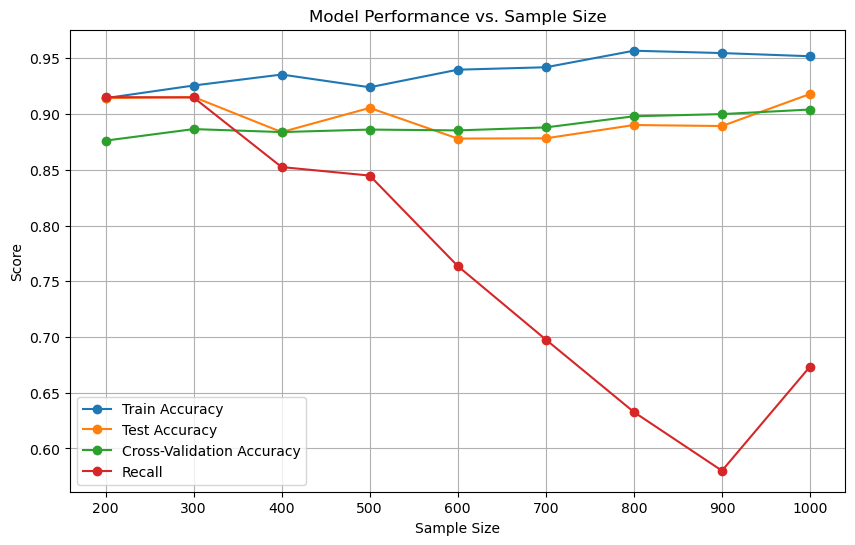

In [11]:
#전체 데이터에서 랜덤서치 사용했을 때 최적의 0 개수 찾기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from scipy.stats import randint

# 데이터 불러오기
data = pd.read_csv('./data_reduced.csv')

sample_sizes = range(200, 1001, 100)
train_accuracy_results = []
test_accuracy_results = []
cv_accuracy_results = []
recall_results = []

# 고정된 random_state를 사용하여 데이터 샘플링 유지
for size in sample_sizes:
    # 언더샘플링
    Training_data_0 = data[data['Bankrupt?'] == 0].sample(size, random_state=41)
    Training_data_1 = data[data['Bankrupt?'] == 1]
    Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

    # 특성과 타겟 변수 분리
    data_input_reduced = Undersample_data.drop(columns=['Bankrupt?'])
    data_target = Undersample_data['Bankrupt?']

    # 데이터 분리
    train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
        data_input_reduced, data_target, random_state=42)

    # 랜덤 포레스트 모델 학습
    rf_model_reduced = RandomForestClassifier(random_state=42)
    rf_model_reduced.fit(train_input_reduced, train_target_reduced)

    # 하이퍼파라미터 튜닝 (랜덤 서치)
    param_dist = {
        'n_estimators': randint(100, 200),
        'max_depth': randint(5, 15),
        'min_samples_split': randint(10, 20),
        'min_samples_leaf': randint(4, 10),
    }

    random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=100,
                                       cv=5,
                                       n_jobs=-1,
                                       scoring='accuracy',
                                       random_state=42)
    random_search.fit(train_input_reduced, train_target_reduced)

    best_rf_model = random_search.best_estimator_

    # 최적의 하이퍼파라미터로 모델 재학습
    best_rf_model.fit(train_input_reduced, train_target_reduced)

    # 예측 (하이퍼파라미터 튜닝 후)
    train_predictions_tuned = best_rf_model.predict(train_input_reduced)
    test_predictions_tuned = best_rf_model.predict(test_input_reduced)

    # 모델 평가 - 정확도 (하이퍼파라미터 튜닝 후)
    train_accuracy_tuned = accuracy_score(train_target_reduced, train_predictions_tuned)
    test_accuracy_tuned = accuracy_score(test_target_reduced, test_predictions_tuned)
    recall_tuned = recall_score(test_target_reduced, test_predictions_tuned)

    train_accuracy_results.append(train_accuracy_tuned)
    test_accuracy_results.append(test_accuracy_tuned)
    recall_results.append(recall_tuned)

    # 교차 검증 (Cross-Validation, 하이퍼파라미터 튜닝 후)
    cv_scores_tuned = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=5)
    cv_accuracy_tuned = np.mean(cv_scores_tuned)
    cv_accuracy_results.append(cv_accuracy_tuned)

    print(f"샘플 크기: {size}, 훈련 세트 정확도: {train_accuracy_tuned}, 테스트 세트 정확도: {test_accuracy_tuned}, 교차 검증 평균 정확도: {cv_accuracy_tuned}, 재현율: {recall_tuned}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracy_results, marker='o', label='Train Accuracy')
plt.plot(sample_sizes, test_accuracy_results, marker='o', label='Test Accuracy')
plt.plot(sample_sizes, cv_accuracy_results, marker='o', label='Cross-Validation Accuracy')
plt.plot(sample_sizes, recall_results, marker='o', label='Recall')
plt.xlabel('Sample Size')
plt.ylabel('Score')
plt.title('Model Performance vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()


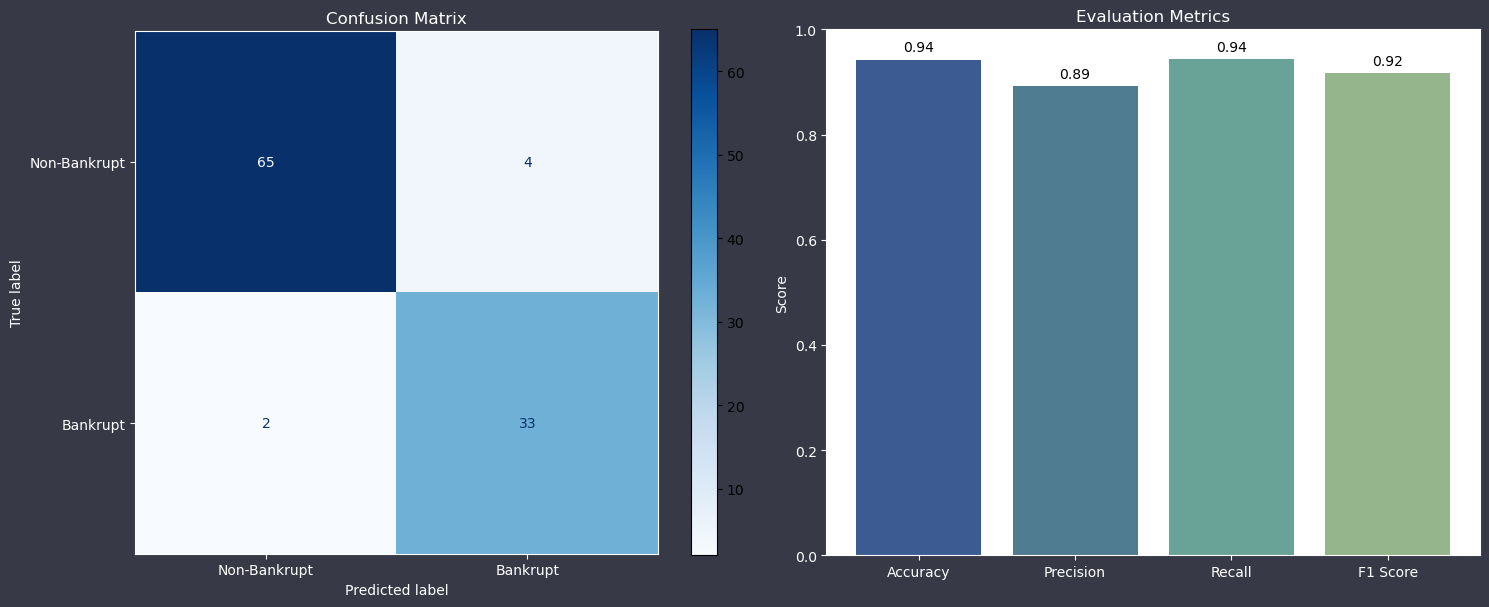

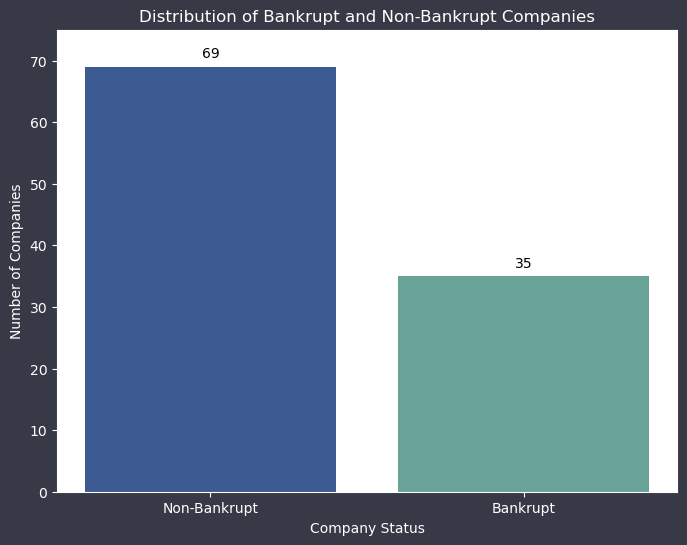

검증 학습데이터 정확도 :0.9495192307692307
검증 평가데이터 정확도 :0.9423076923076923
교차검증 결과 평균 :0.8685840504876648
최적 하이퍼파라미터 값 :RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=161, random_state=42)


In [1]:
# 0인 샘플 300고정, 랜덤포레스트 - 랜덤서치 교차검증(sub, val set)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint


# 데이터 불러오기
data = pd.read_csv('./data_reduced.csv')

# 언더샘플링
Training_data_0 = data[data['Bankrupt?'] == 0].sample(300, random_state=41)
Training_data_1 = data[data['Bankrupt?'] == 1]
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

# 특성과 타겟 변수 분리
data_input = Undersample_data.drop(columns=['Bankrupt?'])
data_target = Undersample_data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝 (랜덤 서치)
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(10, 20),
    'min_samples_leaf': randint(4, 10)
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                    param_distributions=param_dist,
                                    n_iter=150,
                                    cv=5,
                                    n_jobs=-1,
                                    scoring='accuracy',
                                    random_state=42)
random_search.fit(train_input, train_target)

best_rf_model = random_search.best_estimator_

# 교차 검증 결과 보기
cv_results = random_search.cv_results_
cv_scores = cv_results['mean_test_score']

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input, train_target)

# 예측 (하이퍼파라미터 튜닝 후)
train_predictions_tuned = best_rf_model.predict(train_input)
test_predictions_tuned = best_rf_model.predict(test_input)

# 모델 평가 - 정확도 (하이퍼파라미터 튜닝 후)
train_accuracy_tuned = accuracy_score(train_target, train_predictions_tuned)
test_accuracy_tuned = accuracy_score(test_target, test_predictions_tuned)

# 평가 지표 계산
accuracy = accuracy_score(test_target, test_predictions_tuned)
precision = precision_score(test_target, test_predictions_tuned)
recall = recall_score(test_target, test_predictions_tuned)
f1 = f1_score(test_target, test_predictions_tuned)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(test_target, test_predictions_tuned)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('#373947')  # 배경 색상 설정

# 혼동 행렬 시각화
ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Bankrupt', 'Bankrupt']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix', color='white')
axes[0].set_xlabel('Predicted label', color='white')
axes[0].set_ylabel('True label', color='white')
axes[0].tick_params(colors='white')
for spine in axes[0].spines.values():
    spine.set_edgecolor('white')

# 평가 지표 시각화
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]
colors = ['#3b5b92', '#4f7c91', '#69a297', '#95b68c']
bars = axes[1].bar(metrics, scores, color=colors)
axes[1].set_ylim(0, 1)
axes[1].set_title('Evaluation Metrics', color='white')
axes[1].set_ylabel('Score', color='white')
axes[1].tick_params(colors='white')
for spine in axes[1].spines.values():
    spine.set_edgecolor('white')

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

# 타겟 변수 분포 확인
target_counts = test_target.value_counts()

# 불균형 데이터 시각화
plt.figure(figsize=(8, 6))
plt.gcf().set_facecolor('#373947')  # 배경 색상 설정
colors_distribution = ['#3B5B92', '#69A297']  # 두 번째 그래프의 색상에 맞춰 수정
bars = plt.bar(target_counts.index, target_counts.values, color=colors_distribution)
plt.xticks(target_counts.index, ['Non-Bankrupt', 'Bankrupt'])
plt.ylim(0, 75)
plt.xlabel('Company Status', color='white')
plt.ylabel('Number of Companies', color='white')
plt.title('Distribution of Bankrupt and Non-Bankrupt Companies', color='white')
plt.gca().set_facecolor('white') #전체배경색
plt.gca().tick_params(colors='white')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')
# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', color='black')
plt.show()

print(f'검증 학습데이터 정확도 :{train_accuracy_tuned}')
print(f'검증 평가데이터 정확도 :{test_accuracy_tuned}')
# print(f'교차검증 결과 : {cv_results}')
print(f'교차검증 결과 평균 :{np.mean(cv_scores)}')
print(f'최적 하이퍼파라미터 값 :{best_rf_model}')

C:\Users\user\AppData\Local\Temp\ipykernel_7028\1850023215.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_feature_importances['Bankrupt?'] = '파산한 기업'  # '파산한 기업'으로 설정


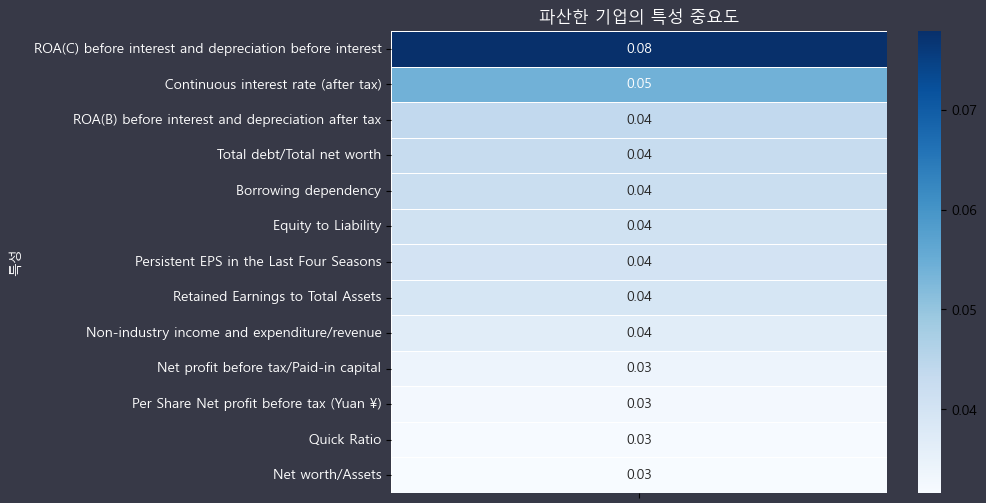

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 추출
importances = best_rf_model.feature_importances_
features = data_input.columns

# 데이터프레임으로 변환
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)  # 내림차순 정렬

# 중요도가 0.03 이하인 특성 제거
filtered_feature_importances = feature_importances[feature_importances['Importance'] > 0.03]

# 파산한 경우에 대한 중요도만 표시
filtered_feature_importances['Bankrupt?'] = '파산한 기업'  # '파산한 기업'으로 설정

# 피벗 테이블 생성
pivot_table = filtered_feature_importances.pivot_table(index='Feature', columns='Bankrupt?', values='Importance')

# 피벗 테이블을 중요도 기준으로 내림차순 정렬
pivot_table = pivot_table.sort_values(by='파산한 기업', ascending=False)

# 히트맵 생성
plt.figure(figsize=(8, 6))
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

heatmap = sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".2f", cbar=True, linewidths=.5, annot_kws={"size": 10})
heatmap.set_xticklabels([])
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10, color='white')
heatmap.set_xlabel('')
plt.title('파산한 기업의 특성 중요도', color='white')
plt.ylabel('특성', color='white')
plt.gcf().patch.set_facecolor('#373947')  # 그래프 전체 배경색 설정
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7028\3134642851.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Centered Importance', x='Feature', data=feature_importances, palette=palette)
C:\Users\user\AppData\Local\Temp\ipykernel_7028\3134642851.py:39: UserWarning: 
The palette list has fewer values (4) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y='Centered Importance', x='Feature', data=feature_importances, palette=palette)


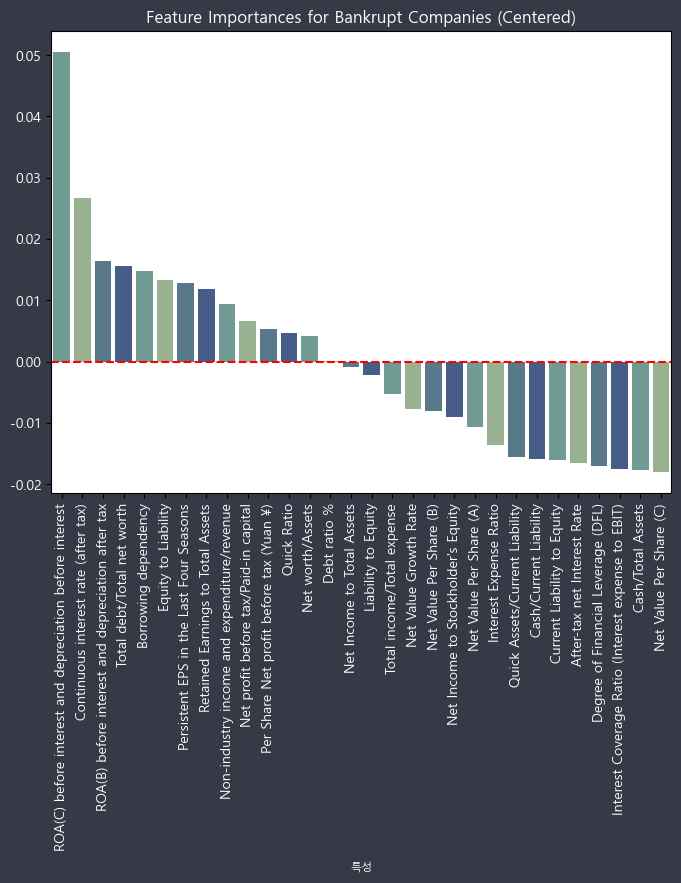

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# 교차 검증 결과 보기
cv_results = random_search.cv_results_
cv_scores = cv_results['mean_test_score']

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input, train_target)

# 특성 중요도 추출
importances = best_rf_model.feature_importances_
features = data_input.columns

# 데이터프레임으로 변환
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(30)

# 중앙을 기준으로 하는 새로운 값을 생성
mean_importance = feature_importances['Importance'].mean()
feature_importances['Centered Importance'] = feature_importances['Importance'] - mean_importance

# 지정된 색상을 랜덤으로 섞음
palette = ['#3b5b92', '#4f7c91', '#69a297', '#95b68c']
np.random.shuffle(palette)

# 그라데이션을 생성
cmap = ListedColormap(palette)

# 파산한 회사의 특성 중요도로 바 그래프 생성 (축 변경)
plt.figure(figsize=(8, 6))
sns.barplot(y='Centered Importance', x='Feature', data=feature_importances, palette=palette)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Feature Importances for Bankrupt Companies (Centered)', color='white')
plt.ylabel('', color='white')
plt.xlabel('특성', fontsize=8, color='white')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.gcf().patch.set_facecolor('#373947')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7028\3351405117.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Centered Importance', x='Feature', data=feature_importances, palette=palette, ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_7028\3351405117.py:44: UserWarning: 
The palette list has fewer values (4) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y='Centered Importance', x='Feature', data=feature_importances, palette=palette, ax=ax1)


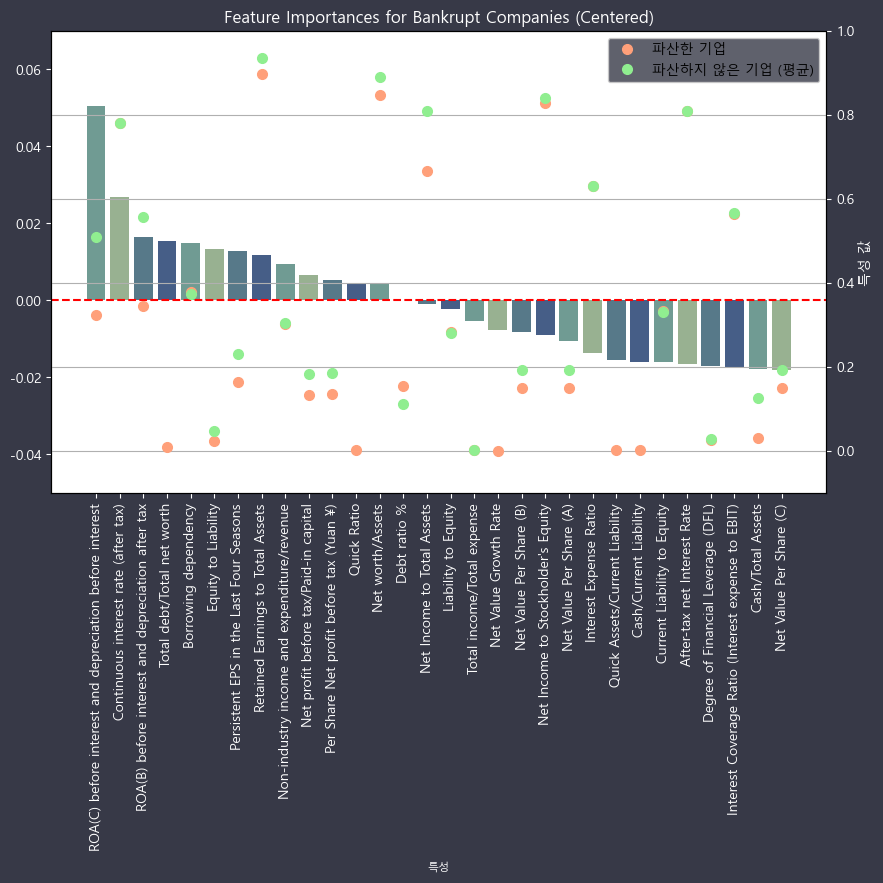

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

# 교차 검증 결과 보기
cv_results = random_search.cv_results_
cv_scores = cv_results['mean_test_score']

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input, train_target)

# 특성 중요도 추출
importances = best_rf_model.feature_importances_
features = data_input.columns

# 데이터프레임으로 변환
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(30)

# 중앙을 기준으로 하는 새로운 값을 생성
mean_importance = feature_importances['Importance'].mean()
feature_importances['Centered Importance'] = feature_importances['Importance'] - mean_importance

# 지정된 색상을 랜덤으로 섞음
palette = ['#3b5b92', '#4f7c91', '#69a297', '#95b68c']
np.random.shuffle(palette)

# 파산한 기업 하나를 랜덤으로 선택
bankrupt_sample = data[data['Bankrupt?'] == 1].sample(1, random_state=50)
bankrupt_sample_features = bankrupt_sample[features].iloc[0][feature_importances['Feature']].values

# 파산하지 않은 기업의 각 특성별 평균 계산
non_bankrupt_mean_features = data[data['Bankrupt?'] == 0][features].mean()[feature_importances['Feature']].values

# 파산한 회사의 특성 중요도로 바 그래프 생성 (축 변경)
fig, ax1 = plt.subplots(figsize=(10, 6))

# 바 그래프
sns.barplot(y='Centered Importance', x='Feature', data=feature_importances, palette=palette, ax=ax1)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_title('Feature Importances for Bankrupt Companies (Centered)', color='white')
ax1.set_ylabel('', color='white')
ax1.set_xlabel('특성', fontsize=8, color='white')
ax1.tick_params(axis='x', rotation=90, colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_facecolor('white')  # 그래프 안 배경을 흰색으로 설정
# ax1.grid(True)

# 이중 축 생성
ax2 = ax1.twinx()
ax2.plot(feature_importances['Feature'], bankrupt_sample_features, 'o', color='#FFA07A', markersize=7, label='파산한 기업')
ax2.plot(feature_importances['Feature'], non_bankrupt_mean_features, 'o', color='#90EE90', markersize=7, label='파산하지 않은 기업 (평균)')
ax2.set_ylabel('특성 값', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.set_facecolor('white')  # 그래프 안 배경을 흰색으로 설정
ax2.grid(True)  # 이중 축의 그리드는 끔

# y축의 범위 설정
ax1_ylim = ax1.get_ylim()
ax2_ylim = ax2.get_ylim()
ax1.set_ylim(-0.05, 0.07)  # 바 그래프의 y축 범위
ax2.set_ylim(-0.1, 1)  # 점 그래프의 y축 범위

# 범례 추가
ax2.legend(loc='upper right', fontsize=10, facecolor='#373947')

# 그래프 전체 배경색 설정
fig.patch.set_facecolor('#373947')

plt.show()


## Bar Graph (Centered Importance):

- 파산한 기업의 특성 중요도를 나타내며, 중심을 기준으로 중요도가 얼마나 벗어나는지를 보여줍니다.
- 파산한 기업의 특성들이 예측 모델에서 얼마나 중요한지를 나타냅니다. 빨간 점선은 평균 중요도를 나타내며, 이 선을 기준으로 위쪽은 평균보다 중요한 특성, 아래쪽은 평균보다 덜 중요한 특성을 의미합니다.
### Line Graph (Red):

- 랜덤으로 선택된 파산한 기업의 각 특성 값을 선으로 연결한 것입니다.
- 빨간 선과 점은 각각의 특성 값이 어떻게 변하는지를 보여줍니다. 높은 값은 해당 특성이 파산한 기업에서 높게 - - - 나타났음을 의미합니다.
### Line Graph (Blue):

- 랜덤으로 선택된 파산하지 않은 기업의 각 특성 값을 선으로 연결한 것입니다.
- 파란 선과 점은 파산하지 않은 기업의 특성 값 변화를 보여줍니다.

## Bar Graph (Centered Importance):

특정 특성이 파산 예측 모델에서 얼마나 중요한지를 시각화합니다. 중요한 특성일수록 높은 막대로 나타납니다. 예를 들어, 'ROA(C) before interest and depreciation before interest'가 파산 예측에서 가장 중요한 특성으로 나타났습니다.
### Red Line Graph:

파산한 기업의 특성 값 분포를 나타냅니다. 예를 들어, 'ROA(C) before interest and depreciation before interest' 특성의 값이 매우 높음을 보여줍니다. 이는 이 특성이 파산한 기업에서 매우 높게 나타난다는 것을 의미할 수 있습니다.
### Blue Line Graph:

파산하지 않은 기업의 특성 값 분포를 나타냅니다. 예를 들어, 파산하지 않은 기업에서는 'ROA(C) before interest and depreciation before interest' 특성 값이 낮게 나타나고 있습니다.
## 결론:
이 그래프는 두 기업(파산한 기업과 파산하지 않은 기업)의 특성 값을 비교하여, 어떤 특성이 파산 예측에 중요한지, 그리고 해당 특성 값이 두 그룹 간에 어떻게 다른지를 시각적으로 보여줍니다. 이를 통해 예측 모델에서 중요한 특성과, 파산한 기업과 파산하지 않은 기업 간의 차이를 더 명확히 이해할 수 있습니다.